# Reproducing Results from the Paper
This notebook will show the results from the paper after running all the experiments. The required files should be saved in the corresponding directories.

## Table of Contents <a class="anchor" id="bullet0"></a>

### Simulated Dataset

* [Performance on simulated datasets](#bullet1)
* [WinIT performance on Delayed Spike for different window sizes](#bullet2)
* [Saliency map](#bullet3)

### MIMIC Experiments

* [Load the results for MIMIC-III experiments](#bullet4)
* [Performance on MIMIC using END masking](#bullet5)
* [AUC Drop performance on MIMIC-III mortality using different metrics in WinIT for STD masking](#bullet6)
* [Counts of masked observations for IG, FIT, Dynamask and WinIT at each time step in the MIMIC-III K=50 performance drop experiment](#bullet7)
* [Performance on MIMIC for different window sizes](#bullet8)
* [Saliency map](#bullet9)
* [Precision-Recall Curve for Dynamask](#bullet10)
* [AUC Drop, Mean Prediction Changes and number of masked observations for STD-BAL, STD and END masking method for different explainability methods on K=50](#bullet11)
  * [1-Layer GRU](#bullet12)
  * [ConvNet](#bullet13)
  * [LSTM](#bullet14)
  * [3-Layer GRU](#bullet15)

Import the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
from PIL import Image
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
import pickle as pkl

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [2]:
pd.options.display.float_format = '{:.3f}'.format

A convenient function to simplify the explainer string, especially for dynamask.

In [3]:
def simplify_explainer_str(x):
    explainer_name = x.split("_")[0]
    if explainer_name not in ["winit"]:
        return explainer_name
    return x

### Performance on the simulated datasets. <a class="anchor" id="bullet1"></a> $\quad$ [TOP](#bullet0) 


In [5]:
show_std = True

sims = [
        # "spike", 
        # "spike_delay_2", 
        "state",
        # "mitecg",
        # "data_l2x"
        ]
explainers = ["deeplift", 
              "gradientshap", 
              "ig", 
              # "fo", "afo", 
            #   "fit", 
              # "dynamask", 
        #       "winit_window_10_pd",
              "winit_window_10_pd_usedatadist",
        #       "biwinit_window_10_pd"
              "biwinit",
              "jimex"
              ]
to_show = ["mean", "std"] if show_std else ["mean"]
dic = {}
for sim in sims:
    data_dir_name = f"simulated_{sim}"
#     data_dir_name = f"{sim}"
    df = pd.read_csv(f"../output/gru1layer/{data_dir_name}/results.csv")
    df["explainer"] = df["explainer"].apply(simplify_explainer_str)
    df = df[df["explainer"].apply(lambda x: x in explainers)]
    dh = (df
          .drop(["cv", 
                #  "Auroc",
                #    "Pos ratio",
                #      "Mean rank"
                     ], axis=1)
          .groupby(by=["dataset", "explainer"])
          .agg(to_show)
          .reset_index(0)
          .drop(["dataset",
                  # "Avpr"
                  ], axis=1, level=0)
          .loc[explainers]
         )
    dic[sim] = dh

pd.concat(dic, axis=1)

state                                          \
                               Auroc        Avpr       Auprc       Mean rank   
                                mean   std  mean   std  mean   std      mean   
explainer                                                                      
deeplift                       0.525 0.009 0.028 0.016 0.028 0.017   166.320   
gradientshap                   0.524 0.001 0.021 0.000 0.021 0.000   141.933   
ig                             0.529 0.002 0.021 0.000 0.021 0.000   140.467   
winit_window_10_pd_usedatadist 0.553 0.059 0.041 0.038 0.041 0.038   161.935   
biwinit                        0.505 0.000 0.019 0.001 0.019 0.001   147.156   
jimex                          0.503   NaN 0.061   NaN 0.062   NaN   297.464   

                                                                               
                                      Mean rank (min)        Pos ratio         
                                  std            mean    std      mean    std  
explainer                                                                      
deeplift                       63.247         162.972 55.047    10.611 12.213  
gradientshap                    0.495         141.933  0.495     5.625  0.000  
ig                              0.604         140.467  0.604     5.625  0.000  
winit_window_10_pd_usedatadist 40.202         161.935 40.202    13.104 14.957  
biwinit                         0.010         147.156  0.010     5.625  0.000  
jimex                             NaN          60.492    NaN    35.540    NaN

In [8]:
df

,dataset,explainer,date,level_0,cv,Auroc,Avpr,Auprc,Mean rank,Mean rank (min),Pos ratio
5,simulated_state,deeplift,20250528-0544,mean,0,0.529,0.021,0.021,140.252,140.252,5.625
6,simulated_state,deeplift,20250528-0544,mean,1,0.530,0.022,0.022,140.172,140.172,5.625
7,simulated_state,deeplift,20250528-0544,mean,2,0.525,0.021,0.021,141.548,141.548,5.625
8,simulated_state,deeplift,20250528-0544,mean,3,0.529,0.021,0.021,140.348,140.348,5.625
9,simulated_state,deeplift,20250528-0544,mean,4,0.529,0.022,0.021,140.181,140.181,5.625
10,simulated_state,gradientshap,20250528-0544,mean,0,0.525,0.021,0.021,141.595,141.595,5.625
11,simulated_state,gradientshap,20250528-0544,mean,1,0.525,0.021,0.021,141.933,141.933,5.625
12,simulated_state,gradientshap,20250528-0544,mean,2,0.522,0.021,0.021,142.755,142.755,5.625
13,simulated_state,gradientshap,20250528-0544,mean,3,0.525,0.021,0.021,141.885,141.885,5.625
14,simulated_state,gradientshap,20250528-0544,mean,4,0.525,0.021,0.021,141.498,141.498,5.625


### WinIT performance on Delayed Spike for different window sizes  <a class="anchor" id="bullet2"></a>$\quad$ [TOP](#bullet0) 

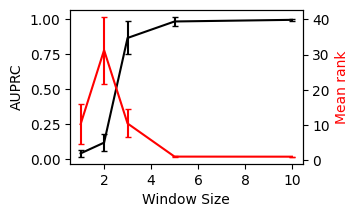

In [5]:
show_std = True
windows = [1,2,3,5,10]

dg = pd.read_csv(f"../output/gru1layer/simulated_spike_delay_2/results.csv")
explainers = [f"winit_window_{window}_pd" for window in windows]
to_show = ["mean", "std"] if show_std else ["mean"]
dg = (dg
      .drop(["cv", "Auroc", "Pos ratio", "Mean rank", "dataset", "Avpr"], axis=1)
      .groupby(by=["explainer"])
      .agg(to_show)
      .loc[explainers]
     )

plt.close()
fig, ax = plt.subplots(figsize=(3, 2))
ax.errorbar(windows, dg["Auprc"]["mean"], yerr=dg["Auprc"]["std"], capsize=2, color="black")
ax.set_ylabel("AUPRC")
ax.set_xlabel("Window Size")

ax2 = ax.twinx()
ax2.set_ylabel('Mean rank', color="red")
ax2.errorbar(windows, dg["Mean rank (min)"]["mean"], yerr=dg["Mean rank (min)"]["std"], capsize=2, color="red")
plt.show()

### Saliency maps <a class="anchor" id="bullet3"></a>$\quad$ [TOP](#bullet0) 

#### Spike

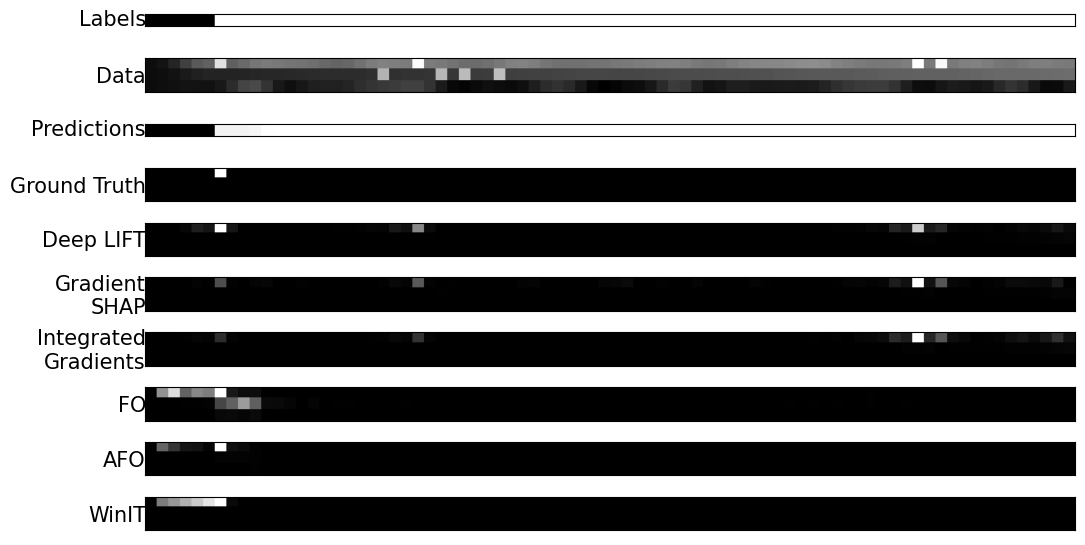

In [14]:
j = 1
# sim = "spike_delay_2"
sim = "spike"
# sim = "state"
# sim = "data_l2x"
cv = 4

extras = ['labels', 'data', f'preds_cv_{cv}', 'ground_truth_attributions']
extra_names = ['Labels', "Data", "Predictions", "Ground Truth"]
explainers = ["deeplift", 
              "gradientshap", 
              "ig",
              "fo", "afo", 
            #   "fit", 
              "winit_window_10_pd"]
explainer_names = ["Deep LIFT", 
                   "Gradient\nSHAP", 
                   "Integrated\nGradients", 
                   "FO", "AFO", 
                #    "FIT", 
                   "WinIT"]

plt.close()
fig, ax = plt.subplots(len(explainers)+len(extras), 1, figsize=(12, 7))

for i, (extra, extra_name) in enumerate(zip(extras, extra_names)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    file_name = f"../plots/gru1layer/simulated_{sim}/{extra}_{j}.png"
    with Image.open(file_name) as im:
        ax[i].imshow(im)
        ax[i].text(0, 3 if extra in ['labels', f'preds_cv_{cv}'] else 12, extra_name, 
                   ha='right', fontsize=15, va="center")

for i, (explainer, explainer_name) in enumerate(zip(explainers, explainer_names)):
    i = i + len(extras)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    file_name = f"../plots/gru1layer/simulated_{sim}/{explainer}_mean_cv_{cv}_attributions_{j}.png"
    with Image.open(file_name) as im:
        ax[i].imshow(im)
    ax[i].text(0, 12, explainer_name, ha="right", fontsize=15, va="center")

plt.show()

#### State

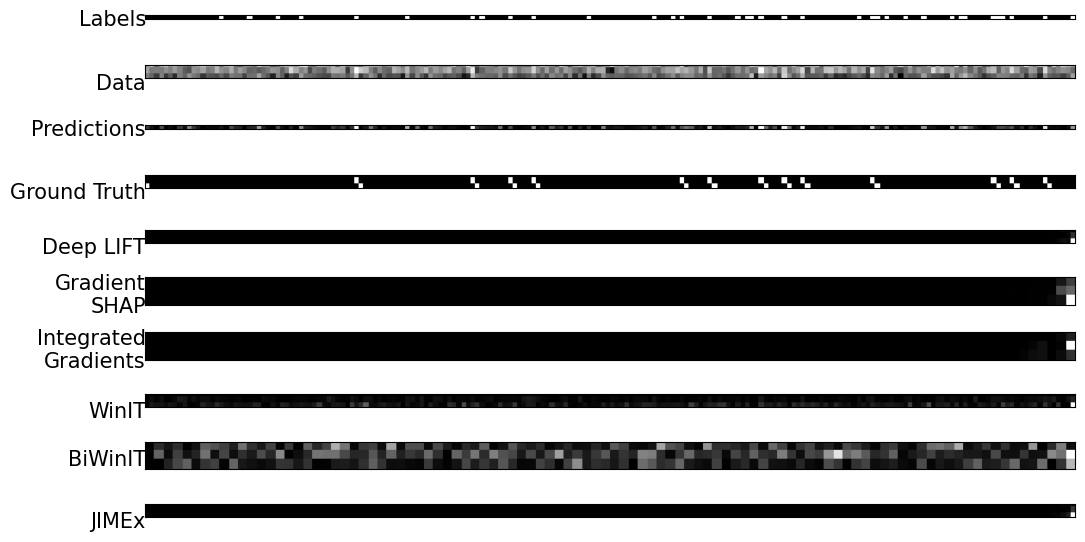

In [9]:
j = 0
# sim = "spike_delay_2"
# sim = "spike"
sim = "state"
# sim = "data_l2x"
cv = 0

extras = ['labels', 'data', f'preds_cv_{cv}', 'ground_truth_attributions']
extra_names = ['Labels', "Data", "Predictions", "Ground Truth"]
explainers = ["deeplift", 
              "gradientshap", 
              "ig",
            #   "fo", "afo", 
            #   "fit", 
              "winit_window_10_pd_usedatadist",
              "biwinit_window_10_pd_usedatadist",
              "jimex_num_samples_3_pd"]
explainer_names = ["Deep LIFT", 
                   "Gradient\nSHAP", 
                   "Integrated\nGradients", 
                #    "FO", "AFO", 
                #    "FIT", 
                   "WinIT",
                   "BiWinIT",
                   "JIMEx"]

plt.close()
fig, ax = plt.subplots(len(explainers)+len(extras), 1, figsize=(12, 7))

for i, (extra, extra_name) in enumerate(zip(extras, extra_names)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    file_name = f"../plots/gru1layer/simulated_{sim}/{extra}_{j}.png"
    with Image.open(file_name) as im:
        ax[i].imshow(im)
        ax[i].text(0, 3 if extra in ['labels', f'preds_cv_{cv}'] else 12, extra_name, 
                   ha='right', fontsize=15, va="center")

for i, (explainer, explainer_name) in enumerate(zip(explainers, explainer_names)):
    i = i + len(extras)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    file_name = f"../plots/gru1layer/simulated_{sim}/{explainer}_mean_cv_{cv}_attributions_{j}.png"
    with Image.open(file_name) as im:
        ax[i].imshow(im)
    ax[i].text(0, 12, explainer_name, ha="right", fontsize=15, va="center")

plt.show()

#### L2X gaussian mixture

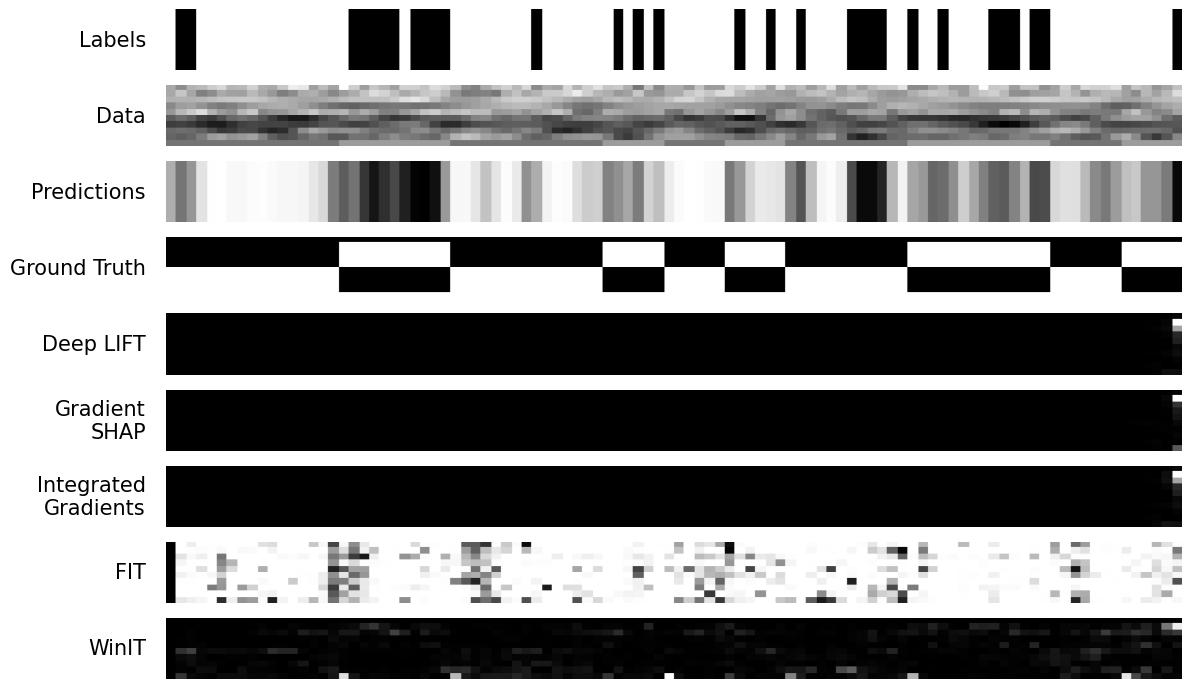

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

j = 7
sim = "data_l2x"
cv = 0

extras = ['labels', 'data', f'preds_cv_{cv}', 'ground_truth_attributions']
extra_names = ['Labels', "Data", "Predictions", "Ground Truth"]
explainers = ["deeplift","gradientshap","ig","fit","winit_window_10_pd"]
explainer_names = ["Deep LIFT","Gradient\nSHAP","Integrated\nGradients","FIT","WinIT"]

fig, ax = plt.subplots(len(extras)+len(explainers), 1, figsize=(12, 7), sharex=True)

for i, (extra, extra_name) in enumerate(zip(extras, extra_names)):
    ax[i].axis('off')
    fn = f"../plots/gru1layer/simulated_{sim}/{extra}_{j}.png"
    img = Image.open(fn)
    # Plot with explicit extent [0,1] on x and y
    ax[i].imshow(img, aspect='auto', extent=[0,1,0,1])
    ax[i].text(-0.02, 0.5, extra_name, ha='right', va='center', fontsize=15)
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)

for k, (explainer, explainer_name) in enumerate(zip(explainers, explainer_names), start=len(extras)):
    ax[k].axis('off')
    fn = f"../plots/gru1layer/simulated_{sim}/{explainer}_mean_cv_{cv}_attributions_{j}.png"
    img = Image.open(fn)
    ax[k].imshow(img, aspect='auto', extent=[0,1,0,1])
    ax[k].text(-0.02, 0.5, explainer_name, ha='right', va='center', fontsize=15)
    ax[k].set_xlim(0,1)
    ax[k].set_ylim(0,1)

plt.tight_layout()
plt.show()


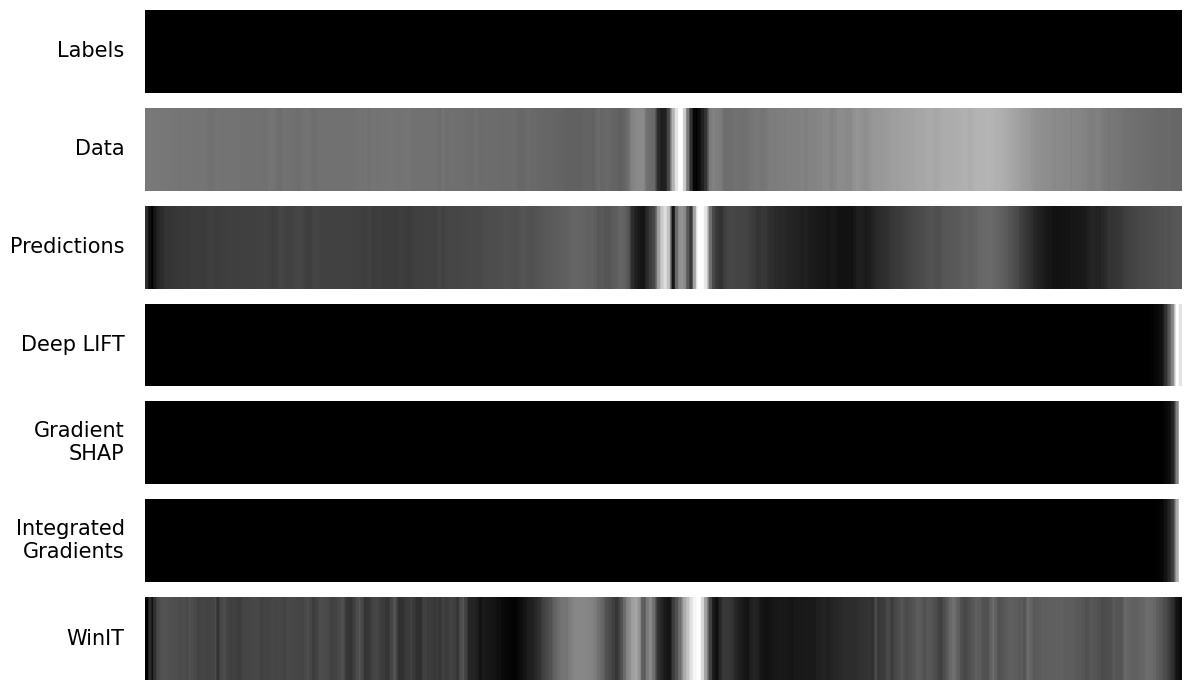

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

j = 7
sim = "mitecg"
cv = 0

extras = ['labels', 
          'data', 
          f'preds_cv_{cv}', 
          # 'ground_truth_attributions'
          ]
extra_names = ['Labels', 
               "Data",
                 "Predictions", 
                #  "Ground Truth"
                 ]
explainers = ["deeplift",
              "gradientshap",
              "ig",
            #   "fit",
              "winit_window_10_pd"]
explainer_names = ["Deep LIFT",
                   "Gradient\nSHAP",
                   "Integrated\nGradients",
                #    "FIT",
                   "WinIT"]

fig, ax = plt.subplots(len(extras)+len(explainers), 1, figsize=(12, 7), sharex=True)

for i, (extra, extra_name) in enumerate(zip(extras, extra_names)):
    ax[i].axis('off')
    fn = f"../plots/gru1layer/{sim}/{extra}_{j}.png"
    img = Image.open(fn)
    # Plot with explicit extent [0,1] on x and y
    ax[i].imshow(img, aspect='auto', extent=[0,1,0,1])
    ax[i].text(-0.02, 0.5, extra_name, ha='right', va='center', fontsize=15)
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)

for k, (explainer, explainer_name) in enumerate(zip(explainers, explainer_names), start=len(extras)):
    ax[k].axis('off')
    fn = f"../plots/gru1layer/{sim}/{explainer}_mean_cv_{cv}_attributions_{j}.png"
    img = Image.open(fn)
    ax[k].imshow(img, aspect='auto', extent=[0,1,0,1])
    ax[k].text(-0.02, 0.5, explainer_name, ha='right', va='center', fontsize=15)
    ax[k].set_xlim(0,1)
    ax[k].set_ylim(0,1)

plt.tight_layout()
plt.show()


### Load the results for MIMIC-III experiments. <a class="anchor" id="bullet4"></a>$\quad$ [TOP](#bullet0) 

In [ ]:
output/gru1layer/mitecg/results.csv

In [6]:
dataset_name = 'mitecg'
df = pd.read_csv(f"../output/gru1layer/{dataset_name}/results.csv")
df["explainer"] = df["explainer"].apply(simplify_explainer_str)
df = df.rename(columns={"level_0": "drop"})

### Performance on MIMIC using END masking <a class="anchor" id="bullet5"></a>$\quad$ [TOP](#bullet0) 

In [7]:
df

,dataset,explainer,date,drop,cv,auc_drop,avg_pred_diff,avg_masked_count
0,mitecg,deeplift,20250622-1523,top50_std_mean,0,0.501,0.201,301.955
1,mitecg,deeplift,20250622-1523,top50_end_mean,0,0.420,0.231,356.019
2,mitecg,deeplift,20250622-1523,globaltop5_std_mean,0,0.101,0.100,60.697
3,mitecg,deeplift,20250622-1523,globaltop5_end_mean,0,0.192,0.144,107.308
4,mitecg,deeplift,20250622-1523,bal50_std_mean,0,0.075,0.085,61.985
5,mitecg,gradientshap,20250622-1524,top50_std_mean,0,0.491,0.207,331.912
6,mitecg,gradientshap,20250622-1524,top50_end_mean,0,0.422,0.232,358.994
7,mitecg,gradientshap,20250622-1524,globaltop5_std_mean,0,0.114,0.098,60.365
8,mitecg,gradientshap,20250622-1524,globaltop5_end_mean,0,0.326,0.158,132.877
9,mitecg,gradientshap,20250622-1524,bal50_std_mean,0,0.051,0.077,61.203


In [8]:
show_std = True

explainers = ["deeplift", 
              "gradientshap",
                "ig",
                  # "fo", "afo", 
                  # "fit", 
                  "dynamask", 
                  "winit_window_10_pd"
                  ]
to_show = ["mean", "std"] if show_std else ["mean"]
dh = (df.drop(["cv", "avg_masked_count"], axis=1)
      .groupby(by=["drop", "explainer"])
      .agg(to_show)
      .reset_index(0)
      .loc[explainers]
     )

dh_1 = dh[dh["drop"] == "top50_end_mean"].drop("drop", axis=1, level=0)
dh_2 = dh[dh["drop"] == "globaltop5_end_mean"].drop("drop", axis=1, level=0)
pd.concat({"Top 5%": dh_2, "Top 50": dh_1}, axis=1)

Top 5%                          Top 50      \
                    auc_drop     avg_pred_diff      auc_drop       
                        mean std          mean std      mean std   
explainer                                                          
deeplift           -0.022656 NaN      0.001382 NaN -0.013318 NaN   
gradientshap       -0.021385 NaN      0.001377 NaN -0.017843 NaN   
ig                 -0.023029 NaN      0.001382 NaN -0.013564 NaN   
dynamask            0.078682 NaN      0.003939 NaN  0.060310 NaN   
winit_window_10_pd  0.005220 NaN      0.003621 NaN  0.060587 NaN   

                                      
                   avg_pred_diff      
                            mean std  
explainer                             
deeplift                0.002324 NaN  
gradientshap            0.002319 NaN  
ig                      0.002316 NaN  
dynamask                0.003335 NaN  
winit_window_10_pd      0.003335 NaN

### AUC Drop performance on MIMIC-III mortality using different metrics in WinIT for STD masking. <a class="anchor" id="bullet6"></a>$\quad$ [TOP](#bullet0) 

In [9]:
show_std = True

to_show = ["mean", "std"] if show_std else ["mean"]
dh = (df[df["explainer"].apply(lambda x: x.startswith("winit_window_10"))]
      .drop(["cv", "avg_masked_count", "avg_pred_diff"], axis=1)
      .groupby(by=["drop", "explainer"])
      .agg(to_show)
      .reset_index(0)
     )
dh_1 = dh[dh["drop"] == "top50_std_mean"].drop("drop", axis=1, level=0)
dh_2 = dh[dh["drop"] == "globaltop5_std_mean"].drop("drop", axis=1, level=0)
dh = pd.concat({"Top 5%": dh_2, "Top 50": dh_1}, axis=1)
dh

Top 5%         Top 50      
                   auc_drop       auc_drop      
                       mean   std     mean   std
explainer                                       
winit_window_10_js    0.075 0.007    0.072 0.007
winit_window_10_kl    0.076 0.006    0.072 0.007
winit_window_10_pd    0.078 0.008    0.076 0.006

### Counts of masked observations for IG, FIT, Dynamask and WinIT at each time step in the MIMIC-III _K_=50 performance drop experiment. <a class="anchor" id="bullet7"></a>$\quad$ [TOP](#bullet0) 
Note that the bar charts are overlapping, instead of stacking.

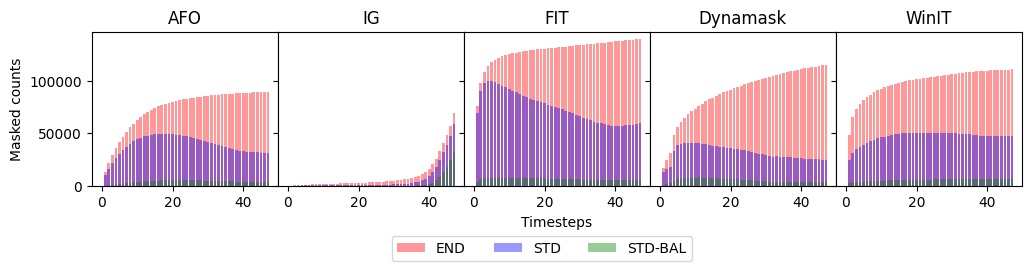

In [10]:
drops = ["top50_end_mean", "top50_std_mean", "bal50_std_mean"]
drop_names = ["END", "STD", "STD-BAL"]
explainers = ["afo", "ig", "fit", "dynamask_fadema_deletion_timereg_0_sizereg_10000_area_0.05_epoch_200",
              "winit_window_10_pd"]
explainer_names = ["AFO", "IG", "FIT", "Dynamask", "WinIT"]
colors = ["red", "blue", "green"]

dic = {}
for drop, explainer in itertools.product(drops, explainers):
    li = [
        np.load(f"../plots/gru1layer/mimic/array/{explainer}_{drop}_all_mask_cv_{cv}.npy")
        for cv in range(5)
    ]
    dic[f"{drop}_{explainer}"] = np.mean(np.stack(li), axis=0)

plt.close()
fig = plt.figure(figsize=(12, 2))
gs = fig.add_gridspec(1, len(explainers), hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
for j, (explainer, explainer_name) in enumerate(zip(explainers, explainer_names)):
    for i, (drop, drop_name, color) in enumerate(zip(drops, drop_names, colors)):
        arr = dic[f"{drop}_{explainer}"]
        axs[j].bar(np.arange(len(arr)), arr, alpha=0.4, color=colors[i], label=drop_name)
    axs[j].set_title(explainer_name)
    
axs[0].set_ylabel("Masked counts")
axs[2].set_xlabel("Timesteps")
    
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.3))
plt.show()

### Performance on MIMIC for different window sizes <a class="anchor" id="bullet8"></a>$\quad$ [TOP](#bullet0) 

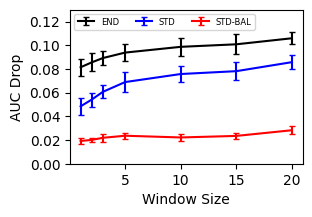

In [11]:
drops = ["top50_end_mean", "top50_std_mean", "bal50_std_mean"]
drop_names = ["END", "STD", "STD-BAL"]
colors = ["black", "blue", "red"]
windows = [1,2,3,5,10,15,20]
explainers = [f"winit_window_{w}_pd" for w in windows]
dh = (df
      .drop(["cv", "avg_masked_count", "avg_pred_diff"], axis=1)
      .groupby(["drop", "explainer"])
      .agg(["mean", "std"])
     )

plt.close()
fig, ax = plt.subplots(figsize=(3, 2))
ax.set_ylabel("AUC Drop")
ax.set_xlabel("Window Size")

for drop, drop_name, color in zip(drops, drop_names, colors):
    dj = dh.loc[drop].loc[explainers]["auc_drop"]
    ax.errorbar(windows, dj["mean"], yerr=dj["std"], capsize=2, color=color, label=drop_name)
ax.legend(loc="upper left", ncol=3, fontsize=6)
ax.set_ylim(0, 0.13)
ax.set_yticks(np.arange(0, 0.13, 0.02))
plt.show()

### Saliency map <a class="anchor" id="bullet9"></a>$\quad$ [TOP](#bullet0) 

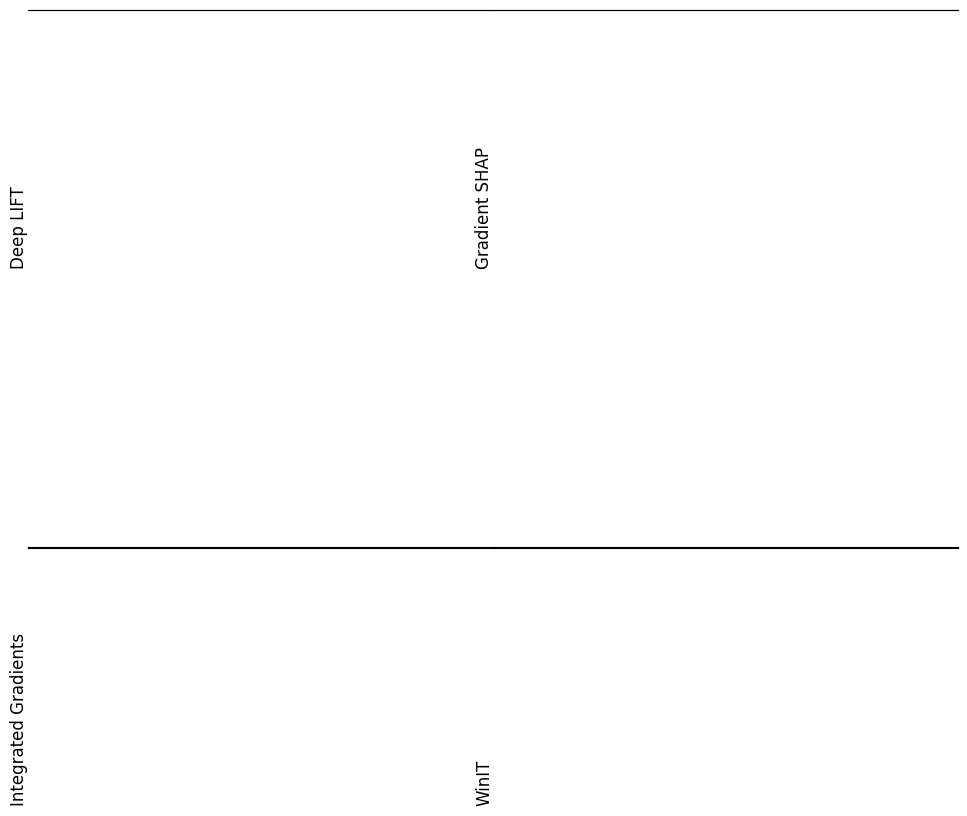

In [26]:
j = 1
cv = 0

explainers_mimic = ["deeplift",
                     "gradientshap", 
                     "ig", 
                    #  "fo", "afo", "fit", 
                    # "dynamask_gaussian_timereg_1_sizereg_100_area_0.05_epoch_200", 
                    "winit_window_10_pd"]
explainer_names = ["Deep LIFT", 
                    "Gradient SHAP", 
                    "Integrated Gradients", 
                #     "FO", "AFO", 
                #    "FIT", 
                #    "Dynamask",
                    "WinIT"]

plt.close()
ncols = 2
nrows = -(-len(explainers_mimic) // ncols)
aspect = ncols / nrows * 1.8
width = 12
height = width / aspect

fig = plt.figure(figsize=(width, 2*height))
gs = fig.add_gridspec(nrows, ncols, hspace=0.1, wspace=0)
ax = gs.subplots().reshape(-1)
for i, (explainer, explainer_name) in enumerate(zip(explainers_mimic, explainer_names)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    with Image.open(f"../plots/gru1layer/{dataset_name}/{explainer}_mean_cv_{cv}_attributions_{j}.png") as im:
        ax[i].imshow(im)
    ax[i].text(0, 350, explainer_name, ha="right", fontsize=12, rotation=90)

plt.show()

### Precision-Recall Curve for Dynamask <a class="anchor" id="bullet10"></a>$\quad$ [TOP](#bullet0) 

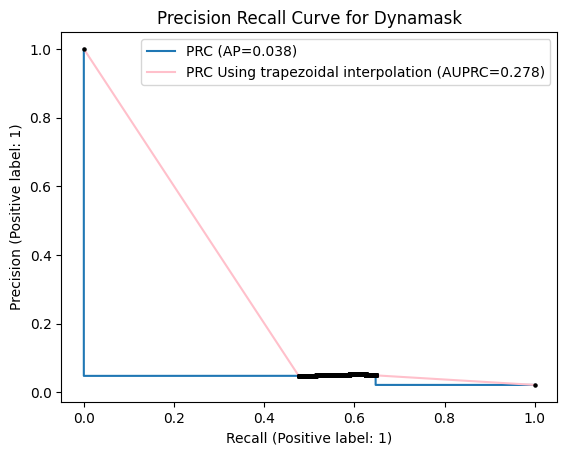

In [13]:
cv = 0
files = [f for f in os.listdir("../output/gru1layer/simulated_state/") if f.startswith("dynamask") and f.endswith(f"{cv}.pkl")]
with open("../output/gru1layer/simulated_state/" + files[0], "rb") as f:
    imp = pkl.load(f)
    
with open('../data/simulated_state_data/state_dataset_importance_test.pkl', 'rb') as f:
    gt = pkl.load(f)

p, r, t = precision_recall_curve(gt.reshape(-1), imp.reshape(-1))
    
plt.close()
display = PrecisionRecallDisplay.from_predictions(
    gt.reshape(-1), imp.reshape(-1)
)
_ = display.ax_.set_title("Precision Recall Curve for Dynamask")
display.ax_.plot(r, p, color="pink", label="PRC Using trapezoidal interpolation (AUPRC=0.278)")
h, l = display.ax_.get_legend_handles_labels()
display.ax_.scatter(r, p, color="black", s=5, zorder=100)
l[0] = "PRC (AP=0.038)"
display.ax_.legend(h, l)
plt.show()

### AUC Drop, Mean Prediction Changes and number of masked observations for STD-BAL, STD and END masking method for different explainability methods on _K_=50 <a class="anchor" id="bullet11"></a>$\quad$ [TOP](#bullet0) 

In [14]:
def show_masking_barcharts(model_architecture):
    df = pd.read_csv(f"../output/{model_architecture}/mimic/results.csv")
    df["explainer"] = df["explainer"].apply(simplify_explainer_str)
    df = df.rename(columns={"level_0": "drop"})

    explainers = ["deeplift", "gradientshap", "ig", "fo", "afo", "fit", "dynamask", "winit_window_10_pd"]
    explainer_names = ["Deep LIFT", "GradSHAP", "IG", "FO", "AFO", "FIT", "Dynamask", "WinIT"]
    graphs = ["auc_drop", "avg_pred_diff", "avg_masked_count"]
    graph_names = ["AUC Drop", "Pred. Change", "Masked Count"]

    drops = ["STD-BAL", "STD", "END"]
    num_explainers = len(explainers)
    colors = ["pink", "pink", "pink", "greenyellow", "greenyellow", "blue", "orange", "mediumpurple"]
    hatches = [None, "///", "++", None, "///", None, None, None]
    ind = np.arange(3)
    width = 0.8
    bar_width = width / num_explainers

    dh = df.drop("cv", axis=1).groupby(by=["explainer", "drop"]).agg("mean").reset_index()
    dh = dh[dh["drop"].apply(lambda x : not x.startswith("global"))]
    dh["drop"] = dh["drop"].apply(lambda x: "STD-BAL" if x.startswith("bal") else x.split("_")[1].upper())

    plt.close()
    fig, ax = plt.subplots(ncols=3, figsize=(12, 3))
    for j, (graph, graph_name) in enumerate(zip(graphs, graph_names)):
        for i, (explainer, explainer_name, color, hatch) in enumerate(
            zip(explainers, explainer_names, colors, hatches)):
            data = dh[dh["explainer"] == explainer].set_index("drop").loc[drops, graph]
            data = np.maximum(data, 0)
            ax[j].barh(ind + i * bar_width, data, bar_width, color=color, 
                       label=explainer_name, hatch=hatch, edgecolor="black")
        ax[j].set_yticks(ind + bar_width * (num_explainers - 1) / 2)
        ax[j].set_yticklabels(drops, rotation=90, va="center")
        ax[j].set_title(graph_name)
        handles, labels = ax[j].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.2), ncols=4)
    plt.show()

### Base model = 1-Layer GRU <a class="anchor" id="bullet12"></a>$\quad$ [TOP](#bullet0) 

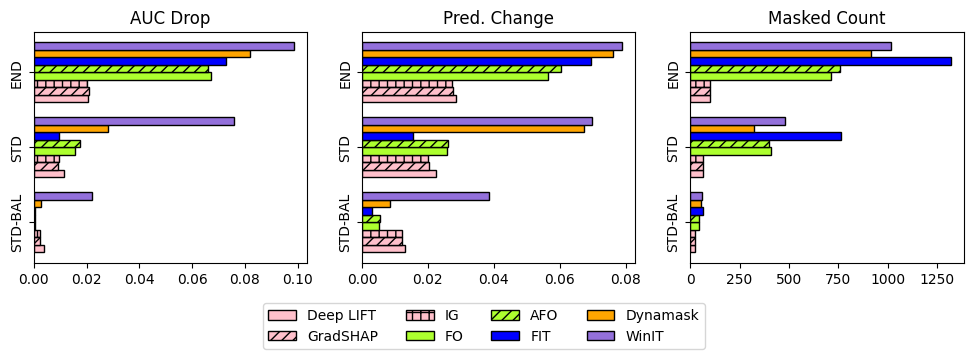

In [15]:
show_masking_barcharts("gru1layer")

### Base model = ConvNet <a class="anchor" id="bullet13"></a>$\quad$ [TOP](#bullet0) 

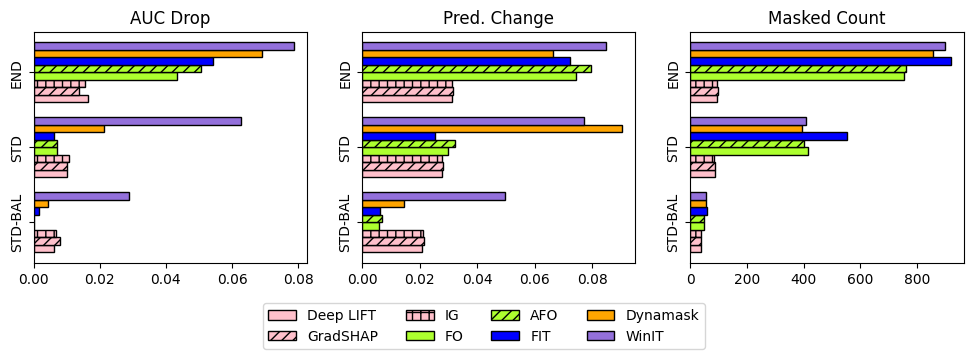

In [16]:
show_masking_barcharts("conv")

### Base model = LSTM <a class="anchor" id="bullet14"></a>$\quad$ [TOP](#bullet0) 

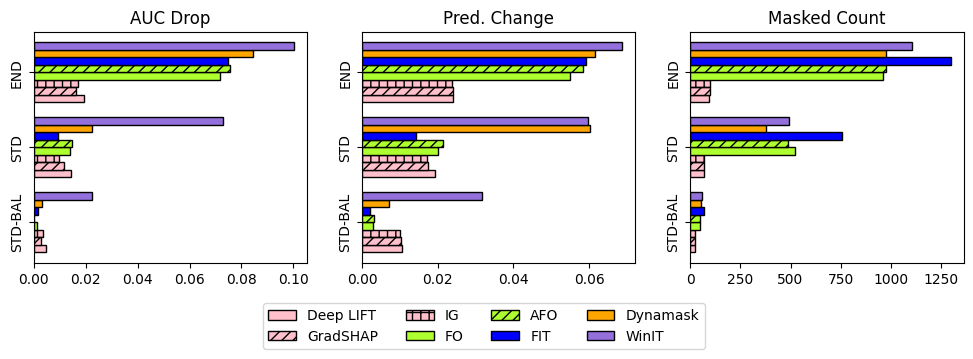

In [17]:
show_masking_barcharts("lstm")

### Base model = 3-Layer GRU <a class="anchor" id="bullet15"></a>$\quad$ [TOP](#bullet0) 

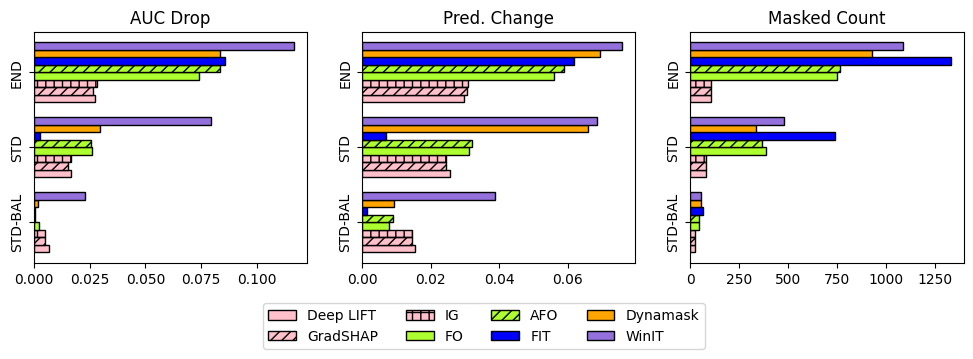

In [18]:
show_masking_barcharts("gru3layer")